In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Зчитуємо CSV файл і перейменовуємо стовпці
df = pd.read_csv('bestsellers with categories.csv')
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [3]:
# Виведення перших п'яти рядків
print(df.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [4]:
# Розміри датасету
print("Розмір датасету:", df.shape)

Розмір датасету: (550, 7)


In [5]:
# Перевірка наявності пропусків
missing_values = df.isna().sum()
if missing_values.any():
    print("Чи є в якихось змінних пропуски? Так")
else:
    print("Чи є в якихось змінних пропуски? Ні")

Чи є в якихось змінних пропуски? Ні


In [6]:
# Унікальні значення в колонці 'genre'
unique_genres = df['genre'].unique()
print("Унікальні жанри:", unique_genres)

Унікальні жанри: ['Non Fiction' 'Fiction']


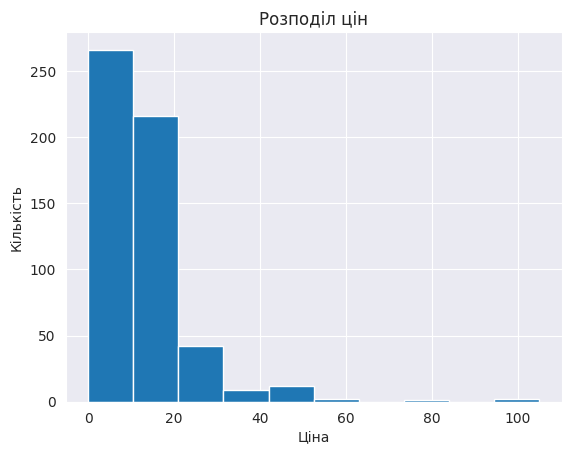

In [7]:
# Розподіл цін
df['price'].plot(kind='hist')
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.title('Розподіл цін')
plt.show()

In [8]:
# Максимальна, мінімальна, середня та медіанна ціни
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()
print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [9]:
# Максимальний рейтинг
max_rating = df['user_rating'].max()
print("Найвищий рейтинг:", max_rating)

Найвищий рейтинг: 4.9


In [10]:
# Кількість книг з найвищим рейтингом
num_max_rating_books = df[df['user_rating'] == max_rating].shape[0]
print("Кількість книг з найвищим рейтингом:", num_max_rating_books)

Кількість книг з найвищим рейтингом: 52


In [11]:
# Книга з найбільшою кількістю відгуків
max_reviews_book = df[df['reviews'] == df['reviews'].max()]['name'].iloc[0]
print("Книга з найбільшою кількістю відгуків:", max_reviews_book)

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


In [12]:
# Найдорожча книга в 2015 році
df_2015 = df[df['year'] == 2015]
expensive_book_2015 = df_2015[df_2015['price'] == df_2015['price'].max()]['name'].iloc[0]
print("Найдорожча книга у 2015 році:", expensive_book_2015)

Найдорожча книга у 2015 році: Publication Manual of the American Psychological Association, 6th Edition


In [13]:
# Кількість книг жанру Fiction в 2010 році
num_fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
print("Кількість книг жанру Fiction в 2010 році:", num_fiction_2010)

Кількість книг жанру Fiction в 2010 році: 20


In [14]:
# Кількість книг з рейтингом 4.9 в 2010 та 2011 роках
num_high_rated_books = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
print("Кількість книг з рейтингом 4.9 в 2010 та 2011 роках:", num_high_rated_books)

Кількість книг з рейтингом 4.9 в 2010 та 2011 роках: 1


In [15]:
# Книга остання у відсортованому списку
filtered_books = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_book = filtered_books.iloc[-1]['name']
print("Книга остання у відсортованому списку:", last_book)

Книга остання у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


In [16]:
# Максимальна та мінімальна ціни для жанрів
genre_price_stats = df.groupby('genre')['price'].agg(['max', 'min'])
print("Максимальна та мінімальна ціни для жанрів:")
print(genre_price_stats)

Максимальна та мінімальна ціни для жанрів:
             max  min
genre                
Fiction       82    0
Non Fiction  105    0


In [17]:
# Кількість книг для кожного автора
author_book_count = df.groupby('author')['name'].count()
print("Кількість книг для кожного автора:")
print(author_book_count)

Кількість книг для кожного автора:
author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Name: name, Length: 248, dtype: int64


In [18]:
# Автор з найбільшою кількістю книг
max_books_author = author_book_count.idxmax()
max_books_count = author_book_count.max()
print("Автор з найбільшою кількістю книг:", max_books_author)
print("Кількість книг цього автора:", max_books_count)

Автор з найбільшою кількістю книг: Jeff Kinney
Кількість книг цього автора: 12


In [19]:
# Середній рейтинг для кожного автора
author_avg_rating = df.groupby('author')['user_rating'].mean()
print("У якого автора середній рейтинг мінімальний:")
print(author_avg_rating.idxmin())
print("Який у цього автора середній рейтинг:")
print(author_avg_rating.min())

У якого автора середній рейтинг мінімальний:
Donna Tartt
Який у цього автора середній рейтинг:
3.9


In [20]:
# З'єднання двох датафреймів
combined_df = pd.concat([author_book_count, author_avg_rating], axis=1)
combined_df.columns = ['Кількість книг', 'Середній рейтинг']
combined_df = combined_df.sort_values(by=['Кількість книг', 'Середній рейтинг'], ascending=[True, True])
print("Автор перший у списку:")
print(combined_df.index[0])

Автор перший у списку:
Muriel Barbery


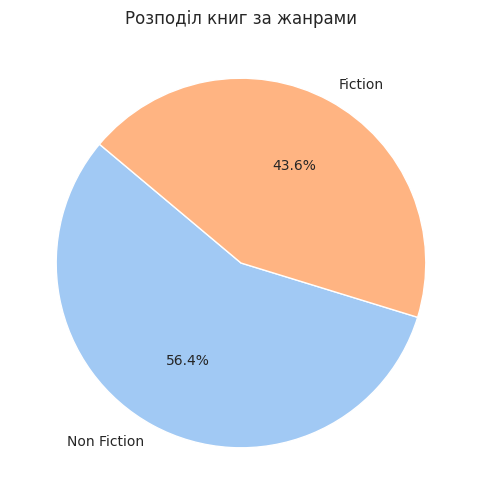

In [21]:
# Створення кругової діаграми для розподілу жанрів
plt.figure(figsize=(8, 6))
genre_counts = df['genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Розподіл книг за жанрами')
plt.show()

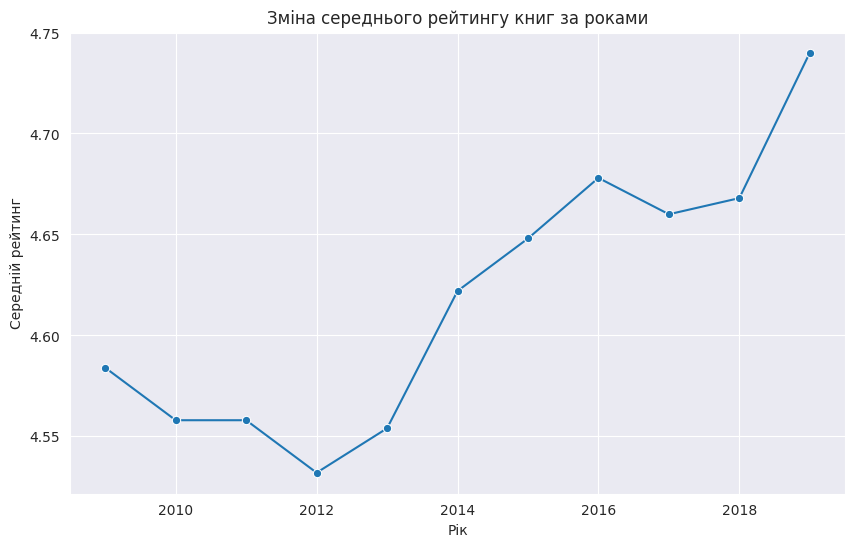

In [22]:
# Створення лінійної діаграми для зміни середнього рейтингу за роками
plt.figure(figsize=(10, 6))
rating_yearly = df.groupby('year')['user_rating'].mean()
sns.lineplot(x=rating_yearly.index, y=rating_yearly.values, marker='o')
plt.xlabel('Рік')
plt.ylabel('Середній рейтинг')
plt.title('Зміна середнього рейтингу книг за роками')
plt.show()

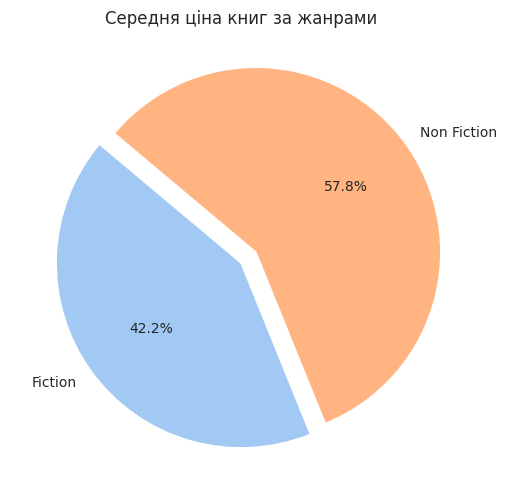

In [23]:
# Створення діаграми ділянками для середньої ціни книг за жанрами
plt.figure(figsize=(8, 6))
genre_price_stats = df.groupby('genre')['price'].mean()
explode = [0.1 if genre == genre_price_stats.idxmax() else 0 for genre in genre_price_stats.index]
plt.pie(genre_price_stats, labels=genre_price_stats.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"), explode=explode)
plt.title('Середня ціна книг за жанрами')
plt.show()